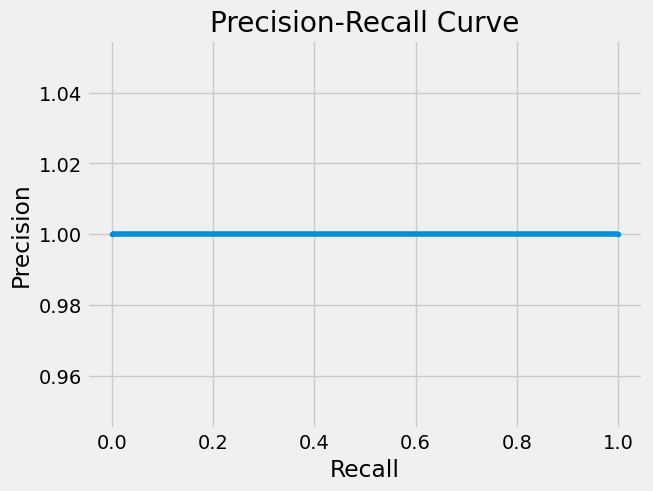

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from matplotlib import style

style.use("fivethirtyeight")

# Read the csv file into a DataFrame
df = pd.read_csv("Tesla_stocks.csv")

# Make two new columns which will be used for making predictions.
df["HL_Perc"] = (df["High"] - df["Low"]) / df["Low"] * 100
df["CO_Perc"] = (df["Close"] - df["Open"]) / df["Open"] * 100

# Make array of dates
# Last 30 dates will be used for forecasting.
dates = np.array(df["Date"])
dates_check = dates[-30:]
dates = dates[:-30]

df = df[["HL_Perc", "CO_Perc", "Adj Close", "Volume"]]

# Define the label column
df["PriceNextMonth"] = df["Adj Close"].shift(-30)

# Make feature and label arrays
X = np.array(df.drop("PriceNextMonth", axis=1))
X = preprocessing.scale(X)
X_Check = X[-30:]
X = X[:-30]
df.dropna(inplace=True)
y = np.array(df["PriceNextMonth"])

# Convert the regression problem to binary classification
threshold = 0.0
y_binary = np.where(y > threshold, 1, 0)

# Divide the data set into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2)

# Define the prediction model
model = RandomForestRegressor()

# Fit the model using training data
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, predictions)

# Plot the precision-recall curve
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()
